<a href="https://colab.research.google.com/github/teixeiragthiago/portfolio/blob/main/Analisando_os_dados_da_Covid_19_em_Franca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de dados da covid-19 em Franca/SP

A pandemia da Covid-19 causada pelo novo corona-vírus SARS-Cov-v2, infelizmente devastou o mundo e mudou nossas vidas de uma forma inimaginável. Porém, essa é a realidade que vivemos atualmente, aqui iremos realizar uma análise de dados para demonstrar como a pandemia evoluiu em número de casos e mortes na cidade de **Franca-SP**

Os dados utilizados para esta análise foram captados no [Brasil.IO](https://brasil.io)

Iremos demonstrar através de dados estatísticos e gráficos como foi a evolução da pandemia na cidade.

### Obtenção dos Dados

Todos os dados usados aqui foram obtivos a partir do site [Brasil.IO](https://brasil.io) que são enviados pelas secretarias de saúde dos municípios.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "https://raw.githubusercontent.com/teixeiragthiago/portfolio/main/covid-franca-short.csv"

df = pd.read_csv(DATA_PATH)

df.date = pd.to_datetime(df.date)
df.set_index("date", inplace=True)

df = df.sort_index(ascending=True)

In [ ]:
df.head()

,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-04-02,SP,Franca,city,1,0,False,355901,3516200,0.28098,0.0
2020-04-03,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0
2020-04-04,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0
2020-04-05,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0
2020-04-06,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0


### Dicionário de Variáveis

O dicíonário de variáveis tem como objetivo nos fornecer metadados para nos guiar pelo dataset, para que possamos usar isso ao novo favor durante a análise de dados!

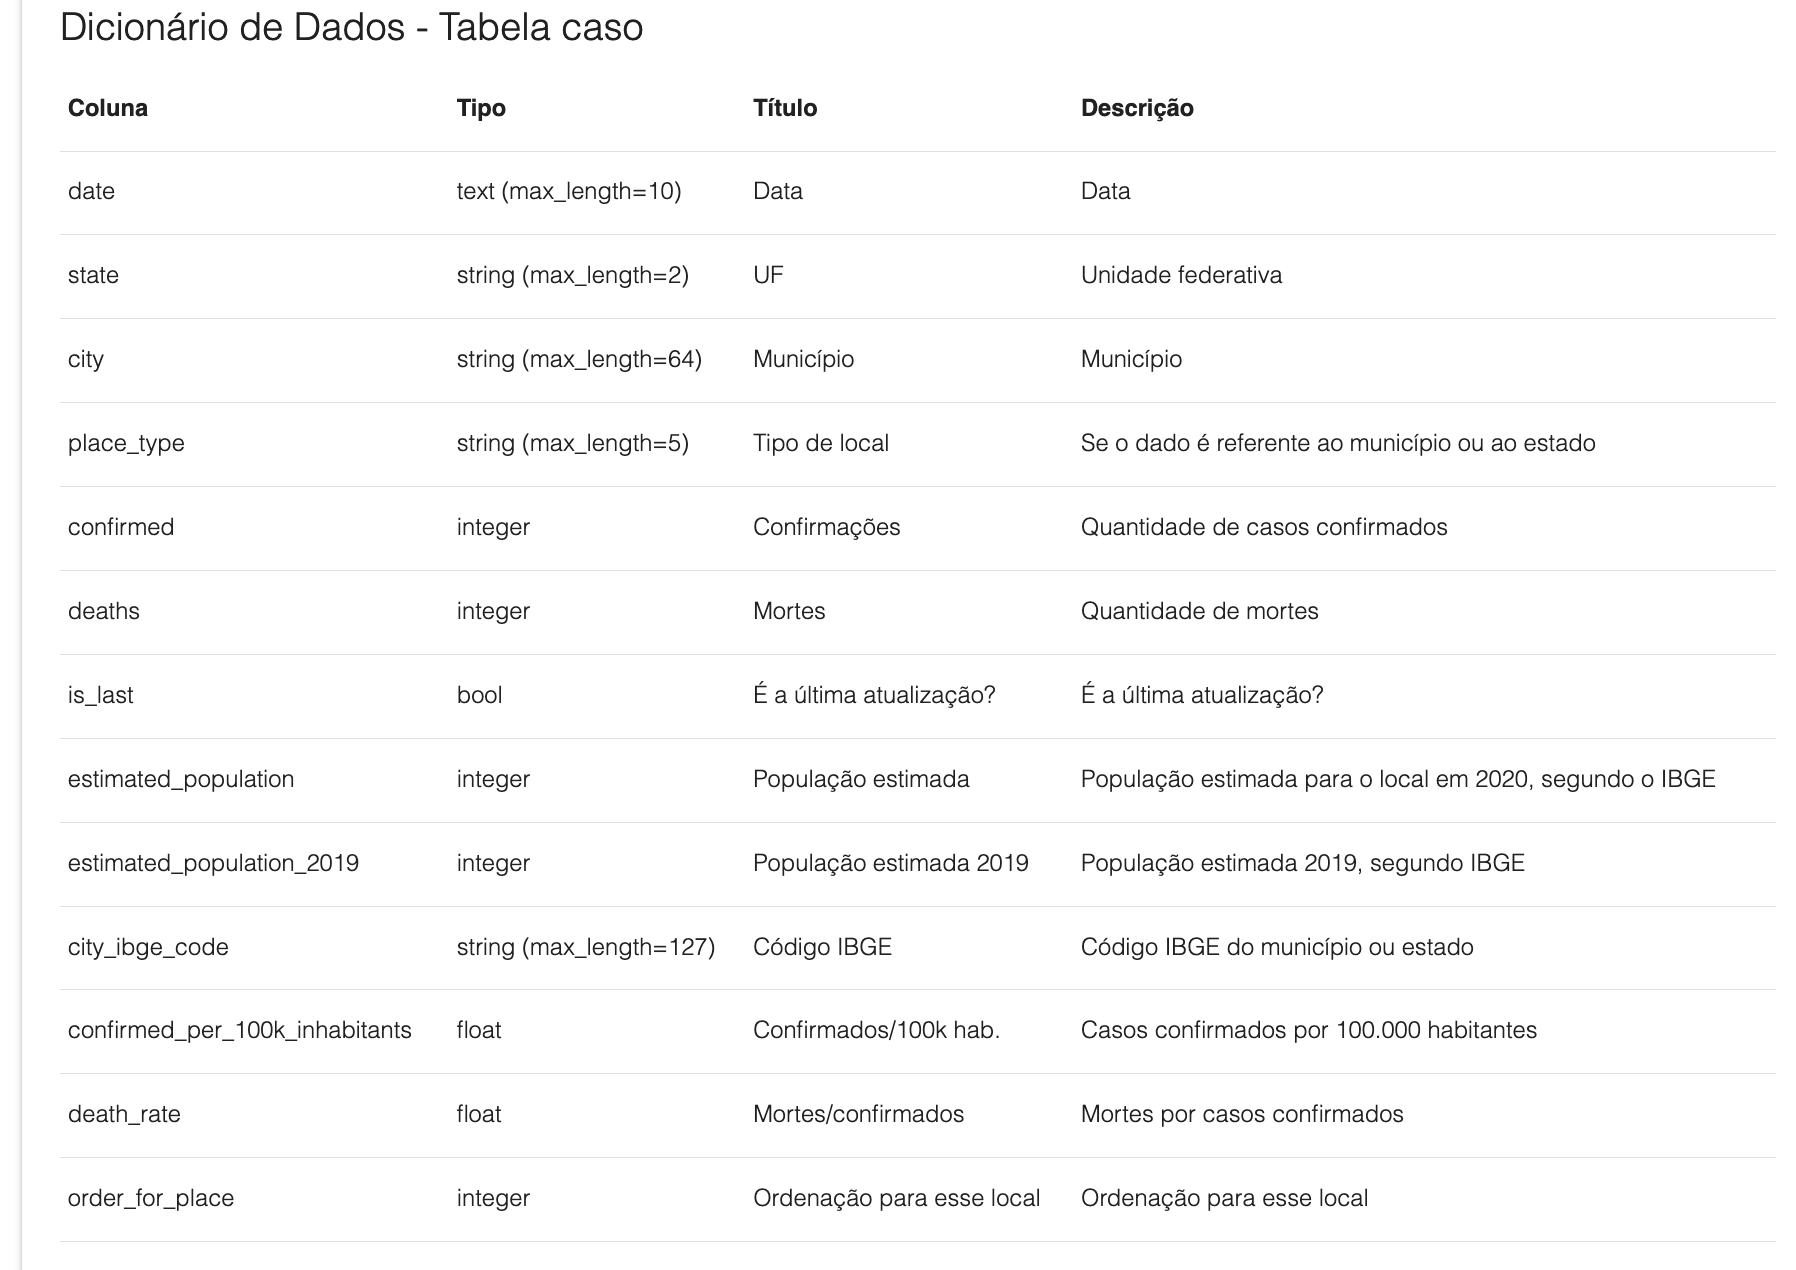

## Quantas entradas linhas/colunas de dados tenho nesse Dataset?

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [ ]:
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

print(f"{df.shape}\n\n")

display(df.dtypes)

Linhas: 319
Colunas: 11
(319, 11)




date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
is_last                              bool
estimated_population                int64
city_ibge_code                      int64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

In [ ]:
df.head()

,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-04-02,SP,Franca,city,1,0,False,355901,3516200,0.28098,0.0
2020-04-03,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0
2020-04-04,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0
2020-04-05,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0
2020-04-06,SP,Franca,city,2,0,False,355901,3516200,0.56195,0.0


### Resumo estatístico

Para iniciar, vamos apresentar um simples resumo estatístico dos dados, apresentando médias, medianas, desvios padrões, máximas, etc.

In [ ]:
df.describe()

,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,319.000000,319.000000,319.0,319.0,319.000000,319.000000
mean,4318.238245,119.755486,355901.0,3516200.0,1213.325684,0.032936
std,4338.382789,111.796971,0.0,0.0,1218.985839,0.026099
min,1.000000,0.000000,355901.0,3516200.0,0.280980,0.000000
25%,160.500000,8.000000,355901.0,3516200.0,45.096810,0.026800
50%,3226.000000,99.000000,355901.0,3516200.0,906.431840,0.029700
75%,7157.000000,215.500000,355901.0,3516200.0,2010.952480,0.033350
max,15079.000000,358.000000,355901.0,3516200.0,4236.852380,0.333300


### Maior número de casos registrado em um único dia

O dia com o maior número de confirmações de casos de covid em Franca, foi no dia 3 de Março de 2021 quando foram confirmados 350 novos casos.

In [ ]:
df[df["confirmed"] == df.confirmed.max()]

,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2021-03-02,SP,Franca,city,15079,358,True,355901,3516200,4236.85238,0.0237


### Maior número de mortes registrado em um único dia

O dia com o maior número de mortes em decorrência de covid em Franca, foi o dia 24 de julho de 2020 quando foram confirmadas 23 mortes.


In [ ]:
df[df["deaths"] == df.deaths.value_counts()[0]]


,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-07-24,SP,Franca,city,582,23,False,355901,3516200,163.52862,0.0395


# Plotagem (Visualização) dos dados

Iremos começar agora a demonstrar através de gráficos algumas informações da evolução da pandemia na cidade.

### Evolução de casos desde o início da pandemia

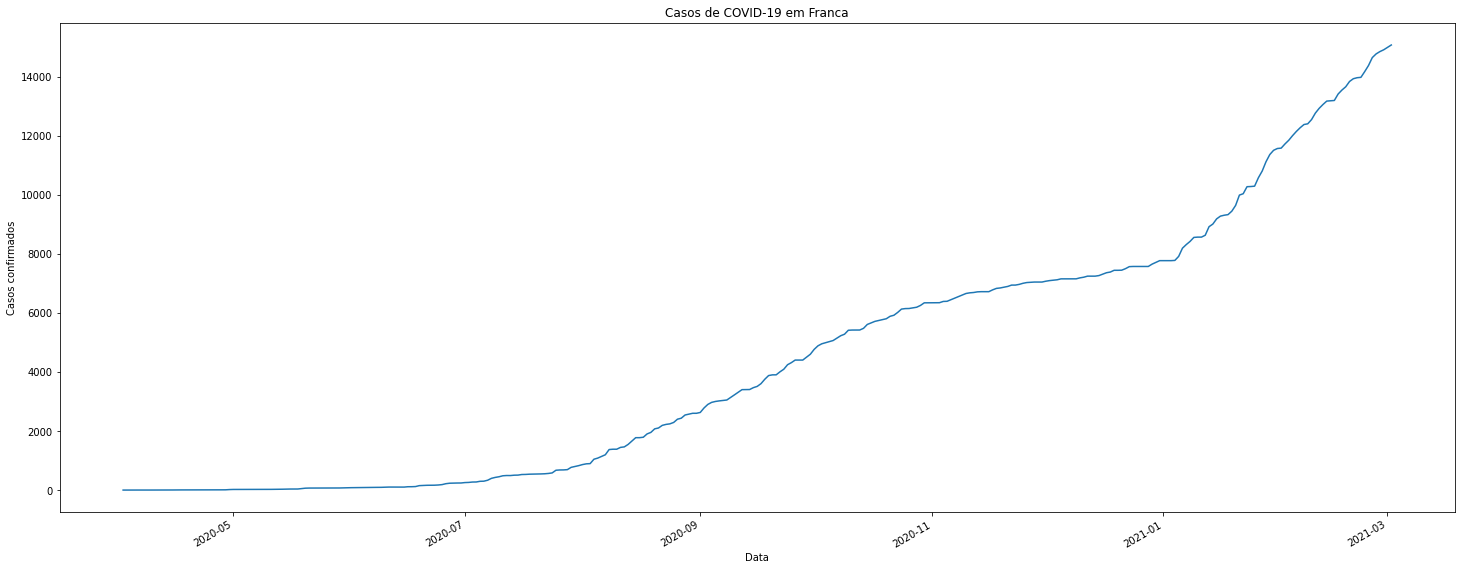

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))

ax.plot("confirmed", data=df);
ax.set_title("Casos de COVID-19 em Franca")
ax.set_xlabel("Data")
ax.set_ylabel("Casos confirmados")

fig.autofmt_xdate()

plt.show()


### Número de mortes desde o início da pandemia

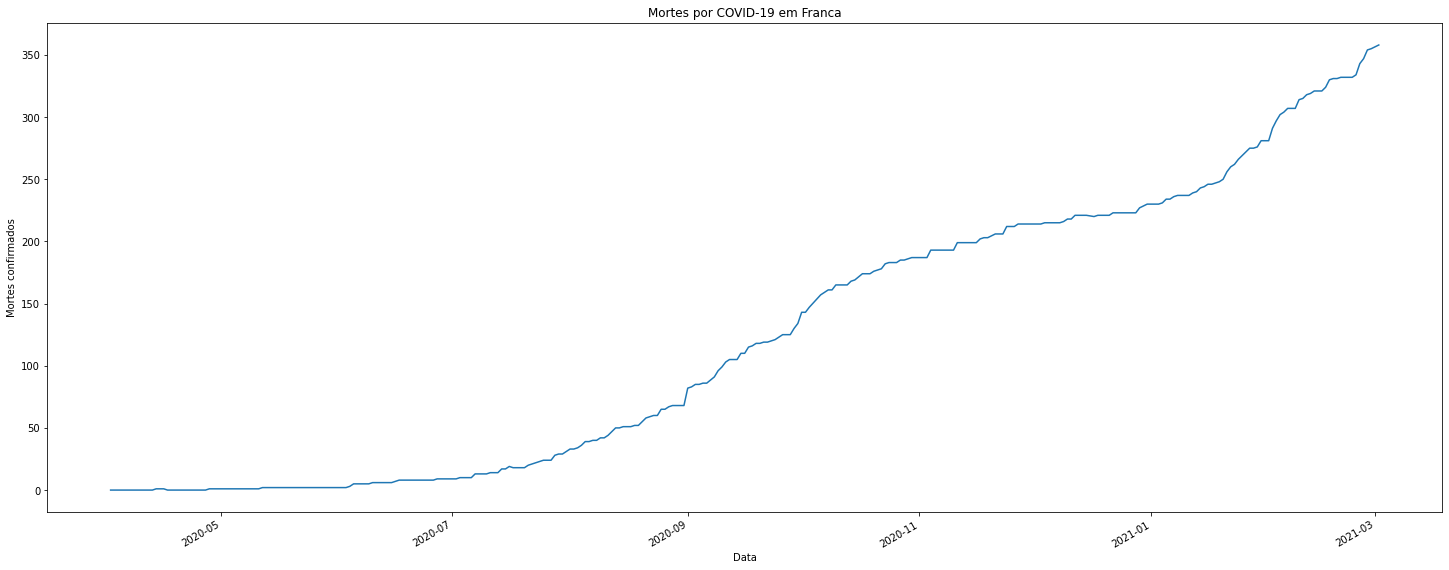

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))

ax.plot("deaths", data=df);
ax.set_title("Mortes por COVID-19 em Franca")
ax.set_xlabel("Data")
ax.set_ylabel("Mortes confirmados")

fig.autofmt_xdate()

plt.show()


### Novos casos e mortes durante durante as festas de final de ano

Durante as festas de final de ano, infelizmente a população mais uma vez não demonstrou seu amor ao próximo e viajaram como se o mundo estivesse uma beleza só, vamos analisar alguns dados.

Fazendo a análise dos gráficos abaixo, podemos extrair as seguintes informações:

Antes das festas de final de ano, entre o período de 1 de novembro e 24 de dezembro, a cidade se encontrava na seguinte situação:

*   No dia 1 de novembro de 2020 a cidade contava com 6346 **casos** e 187 **mortes**
*   No dia 24 de dezembro de 2020 a cidade contava com **7576** casos e 223 **mortes**

Após as festas de final de ano, o cenário era o seguinte:

*   No dia 25 de dezembro de 2020 a cidade contava com os mesmos 7576 **casos** e 223 **mortes**
*   Já no dia **30** de **janeiro** de **2021**, a cidade contabilizava **11511** casos e **281** mortes. Ou seja, **3935** novos casos e **58** novas mortes em pouco mais de **30 dias**!






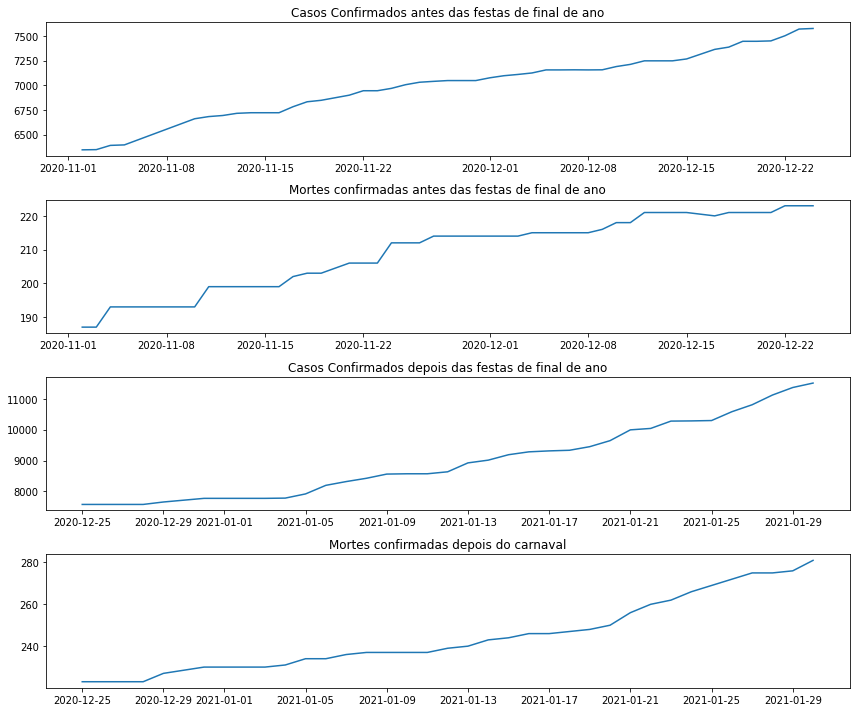

In [157]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,10))

# Antes das festas de final de ano

confirmed_before_endofyear = df.loc['2020-11-01': '2020-12-24']

ax[0].plot('confirmed', data=confirmed_before_endofyear)
ax[0].set_title('Casos Confirmados antes das festas de final de ano')


death_before_endofyear = df.loc['2020-11-01': '2020-12-24']

ax[1].plot('deaths', data=death_before_endofyear)
ax[1].set_title('Mortes confirmadas antes das festas de final de ano')

# Depois das festas de final de ano

confirmed_after_endofyear = df.loc['2020-12-25':'2021-01-30']

ax[2].plot('confirmed', data=confirmed_after_endofyear)
ax[2].set_title('Casos Confirmados depois das festas de final de ano')


death_after_endofyear = df.loc['2020-12-25':'2021-01-30']

ax[3].plot('deaths', data=death_after_endofyear)
ax[3].set_title('Mortes confirmadas depois do carnaval')


plt.tight_layout()

### Novos casos e mortes durante a semana de carnaval

O Carnaval foi um fator determinante para a retomada nas altas dos casos, vamos analisar como foi a curva de casos em um periodo antes da semana do carnaval, e logo depois.

Antes do carnaval , entre o período de 1 de janeiro e 14 de fevereiro, a cidade se encontrava na seguinte situação:

*   No dia 1 de Janeiro de 2021 a cidade contava com 7773 **casos** e 230 **mortes**
*   No dia 14 de Fevereiro de 2020 a cidade contava com 13188 **casos** e 321 **mortes**

Após o carnaval, o cenário era o seguinte:

*   No dia 15 de Fevereiro de 2021 a cidade contava com os mesmos 13199 **casos** e 321 **mortes**
*   Já no dia **5** de **Março** de **2021**, a cidade contabilizava **15079** casos e **358** mortes. Ou seja, **1880** novos casos e **37** novas mortes em pouco mais de **30 dias**!

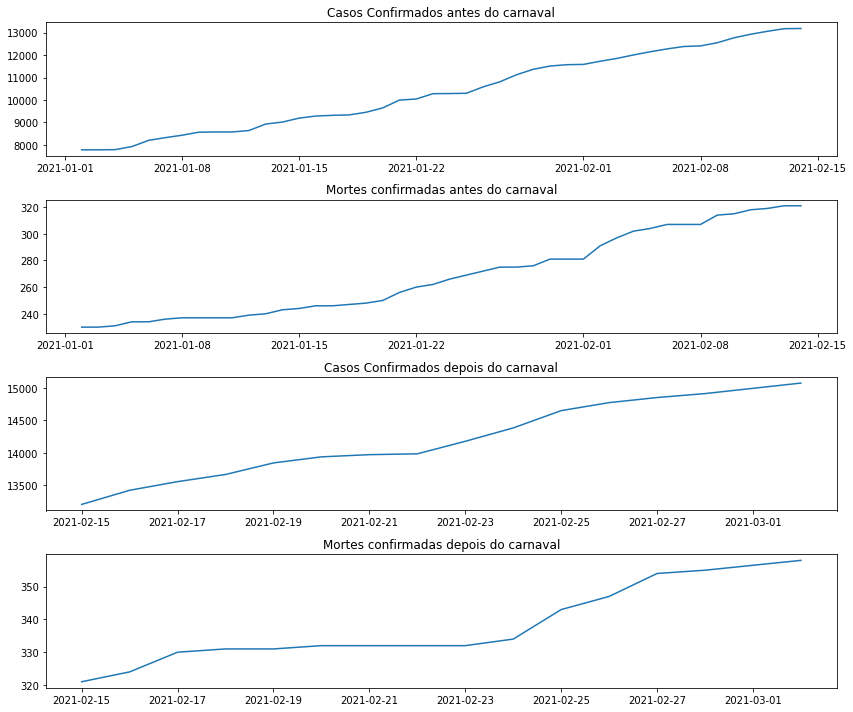

In [158]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,10))

# Antes do carnaval

confirmed_before_carnival = df.loc['2021-01-01':'2021-02-14']

ax[0].plot('confirmed', data=confirmed_before_carnival)
ax[0].set_title('Casos Confirmados antes do carnaval')


death_before_carnival = df.loc['2021-01-01':'2021-02-14']

ax[1].plot('deaths', data=death_before_carnival)
ax[1].set_title('Mortes confirmadas antes do carnaval')

# Depois do carnaval

confirmed_after_carnival = df.loc['2021-02-15':'2021-03-05']

ax[2].plot('confirmed', data=confirmed_after_carnival)
ax[2].set_title('Casos Confirmados depois do carnaval')


death_after_carnival = df.loc['2021-02-15':'2021-03-05']

ax[3].plot('deaths', data=death_after_carnival)
ax[3].set_title('Mortes confirmadas depois do carnaval')

plt.tight_layout()